# Project 6 Capstone - Part 2: Dataset Munging and Cleaning: CDC NPAO

---

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Data Source: 

# Name: CDC Nutrition, Physical Activity, and Obesity by State

# Link: https://data.world/basilhayek/cdc-nutrition-physical-activity-and-obesity-by-state/workspace/file?filename=cdc_npao.csv

# Description: 2011 - 2015 data by state from the CDC Behavioral Risk Factor Surveillance System (BRFSS). 
# Covers questions on nutrition, physical activity, and obesity.

# Data Dictionary: https://data.world/basilhayek/cdc-nutrition-physical-activity-and-obesity-by-state/workspace/data-dictionary
# (2 versions, original and edited, saved in Data folder CDC_Nutrition)

Matt Note:
Goal: Identify the unhealthiest states.
Filter cdc_npao to only the rows where total='Total --> should get you each state
Exercise: Calculate the percentage of people in each state who have PA = NoExercise
FruitVeg: Calculate the percentage of people in each state who eat less than 1 fruit + less than 1 veggie per day. (Group by state, then sum these 2 rows.)
Weight: Calculate the percentage of people in each state who are obese OR are overweight. (Group by state, then sum these 2 rows.)
Try to cluster based on the Exercise, FruitVeg, and Weight variables. See if anything pops out!
Consider visualizing, or doing PCA to squish into 2 dimensions then visualize.
Consider passing your clusters into ChatGPT (or something) to see if it can describe the clusters for you.

In [6]:
df = pd.read_csv('../data/CDC_Nutrition/cdc_npao.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48772 entries, 0 to 48771
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   48772 non-null  int64  
 1   YearEnd                     48772 non-null  int64  
 2   LocationAbbr                48772 non-null  object 
 3   LocationDesc                48772 non-null  object 
 4   Datasource                  48772 non-null  object 
 5   Class                       48772 non-null  object 
 6   Topic                       48772 non-null  object 
 7   Question                    48772 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             48772 non-null  object 
 10  Data_Value                  44169 non-null  float64
 11  Data_Value_Alt              44169 non-null  float64
 12  Data_Value_Footnote_Symbol  4603 non-null   object 
 13  Data_Value_Footnote         460

In [8]:
df.shape

(48772, 33)

In [9]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48772 entries, 0 to 48771
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   48772 non-null  int64  
 1   YearEnd                     48772 non-null  int64  
 2   LocationAbbr                48772 non-null  object 
 3   LocationDesc                48772 non-null  object 
 4   Datasource                  48772 non-null  object 
 5   Class                       48772 non-null  object 
 6   Topic                       48772 non-null  object 
 7   Question                    48772 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             48772 non-null  object 
 10  Data_Value                  44169 non-null  float64
 11  Data_Value_Alt              44169 non-null  float64
 12  Data_Value_Footnote_Symbol  4603 non-null   object 
 13  Data_Value_Footnote         460

In [11]:
df.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               48772
Data_Value_Type                   0
Data_Value                     4603
Data_Value_Alt                 4603
Data_Value_Footnote_Symbol    44169
Data_Value_Footnote           44169
Low_Confidence_Limit           4603
High_Confidence_Limit          4603
Sample_Size                    4603
Total                         47030
Age(years)                    38324
Education                     41804
Gender                        45288
Income                        36578
Race/Ethnicity                34836
GeoLocation                     924
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [12]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [13]:
df['Class'].value_counts()

Class
Physical Activity          25088
Obesity / Weight Status    14840
Fruits and Vegetables       8844
Name: count, dtype: int64

In [14]:
df['LocationDesc'].value_counts()

LocationDesc
Missouri                924
National                924
Nebraska                924
Nevada                  924
New Hampshire           924
New Jersey              924
New Mexico              924
New York                924
North Carolina          924
North Dakota            924
Ohio                    924
Oklahoma                924
Oregon                  924
Pennsylvania            924
Rhode Island            924
South Carolina          924
South Dakota            924
Tennessee               924
Texas                   924
Utah                    924
Vermont                 924
Virginia                924
West Virginia           924
Washington              924
Wisconsin               924
Montana                 924
Wyoming                 924
Mississippi             924
Minnesota               924
Alaska                  924
Arizona                 924
Arkansas                924
California              924
Connecticut             924
Colorado                924
Delawar

In [15]:
df['ClassID'].value_counts()

ClassID
PA     25088
OWS    14840
FV      8844
Name: count, dtype: int64

In [16]:
df['Topic'].value_counts()

Topic
Physical Activity - Behavior        25088
Obesity / Weight Status             14840
Fruits and Vegetables - Behavior     8844
Name: count, dtype: int64

In [17]:
df['Data_Value_Unit'].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
df['Data_Value'].value_counts()

Data_Value
29.6    210
30.2    210
32.7    203
35.9    197
29.4    196
       ... 
6.1       1
1.9       1
6.7       1
73.8      1
3.3       1
Name: count, Length: 667, dtype: int64

In [19]:
df['Education'].value_counts()

Education
Less than high school               1742
High school graduate                1742
Some college or technical school    1742
College graduate                    1742
Name: count, dtype: int64

In [20]:
df['Age(years)'].value_counts()

Age(years)
35 - 44        1742
45 - 54        1742
18 - 24        1741
25 - 34        1741
55 - 64        1741
65 or older    1741
Name: count, dtype: int64

In [21]:
df['Income'].value_counts()

Income
Less than $15,000     1742
$15,000 - $24,999     1742
$25,000 - $34,999     1742
$35,000 - $49,999     1742
$50,000 - $74,999     1742
$75,000 or greater    1742
Data not reported     1742
Name: count, dtype: int64

In [22]:
df['Gender'].value_counts()

Gender
Male      1742
Female    1742
Name: count, dtype: int64

In [23]:
df['GeoLocation'].value_counts()

GeoLocation
(38.635790776000476, -92.56630005299968)     924
(64.84507995700051, -147.72205903599973)     924
(41.6410409880005, -99.36572062299967)       924
(39.493240390000494, -117.07184056399967)    924
(43.65595011300047, -71.50036091999965)      924
(40.13057004800049, -74.27369128799967)      924
(34.52088095200048, -106.24058098499967)     924
(42.82700103200045, -75.54397042699964)      924
(35.466220975000454, -79.15925046299964)     924
(47.47531977900047, -100.11842104899966)     924
(40.06021014100048, -82.40426005599966)      924
(35.47203135600046, -97.52107021399968)      924
(44.56744942400047, -120.15503132599969)     924
(40.79373015200048, -77.86070029399963)      924
(41.70828019300046, -71.52247031399963)      924
(33.998821303000454, -81.04537120699968)     924
(44.353130053000484, -100.3735306369997)     924
(35.68094058000048, -85.77449091399967)      924
(31.827240407000488, -99.42677020599967)     924
(39.360700171000474, -111.58713063499971)    924
(43.6253

In [24]:
df['StratificationCategory1'].value_counts()

StratificationCategory1
Race/Ethnicity    13936
Income            12194
Age (years)       10448
Education          6968
Gender             3484
Total              1742
Name: count, dtype: int64

In [25]:
#New dataframe with just the columns I need:
new_df = df[['LocationDesc', 'Education','Gender', 'Income', 'Age(years)']]

In [26]:
new_df.shape

(48772, 5)

In [27]:
new_df.isna().sum()

LocationDesc        0
Education       41804
Gender          45288
Income          36578
Age(years)      38324
dtype: int64

In [28]:
new_df.head(20)

,LocationDesc,Education,Gender,Income,Age(years)
0,Alabama,NaN,NaN,NaN,NaN
1,Alabama,NaN,Male,NaN,NaN
2,Alabama,NaN,Female,NaN,NaN
3,Alabama,Less than high school,NaN,NaN,NaN
4,Alabama,High school graduate,NaN,NaN,NaN
5,Alabama,Some college or technical school,NaN,NaN,NaN
6,Alabama,College graduate,NaN,NaN,NaN
7,Alabama,NaN,NaN,NaN,18 - 24
8,Alabama,NaN,NaN,NaN,25 - 34
9,Alabama,NaN,NaN,NaN,35 - 44


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48772 entries, 0 to 48771
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationDesc  48772 non-null  object
 1   Education     6968 non-null   object
 2   Gender        3484 non-null   object
 3   Income        12194 non-null  object
 4   Age(years)    10448 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [30]:
### - not a good solution
# Fill missing values with the mode (most frequent value) for categorical variables
# for col in ['Education', 'Gender', 'Income', 'Age(years)']:
#     new_df[col] = new_df[col].fillna(new_df[col].mode()[0])

# Fill missing values with 'unknown' for categorical variables
for col in ['Education', 'Gender', 'Income', 'Age(years)']:
    new_df[col] = new_df[col].fillna('unknown')


/var/folders/xt/hdlbn4j903v98px3bq4pf0jc0000gn/T/ipykernel_44770/2547297473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].fillna('unknown')


In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48772 entries, 0 to 48771
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationDesc  48772 non-null  object
 1   Education     48772 non-null  object
 2   Gender        48772 non-null  object
 3   Income        48772 non-null  object
 4   Age(years)    48772 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


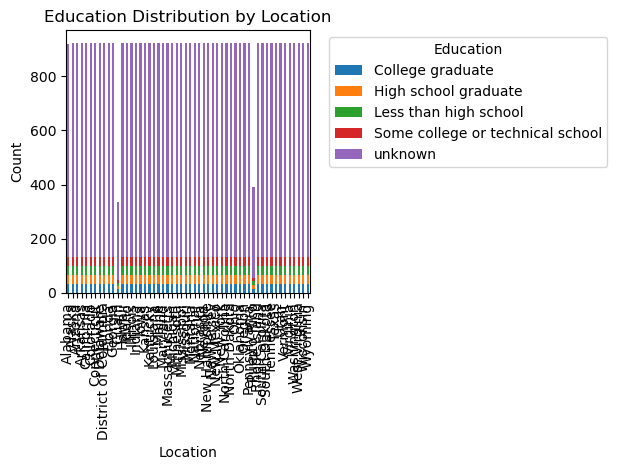

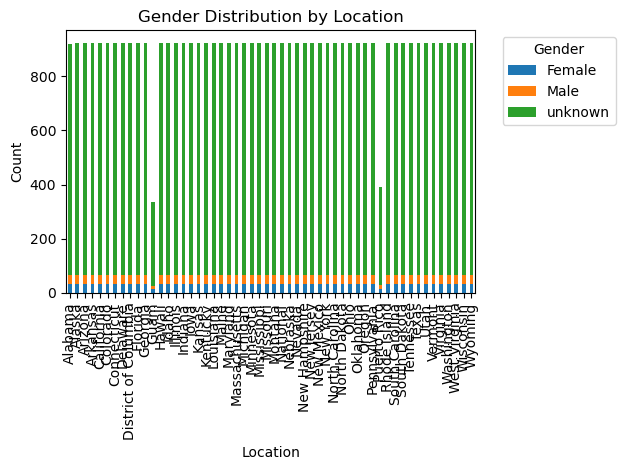

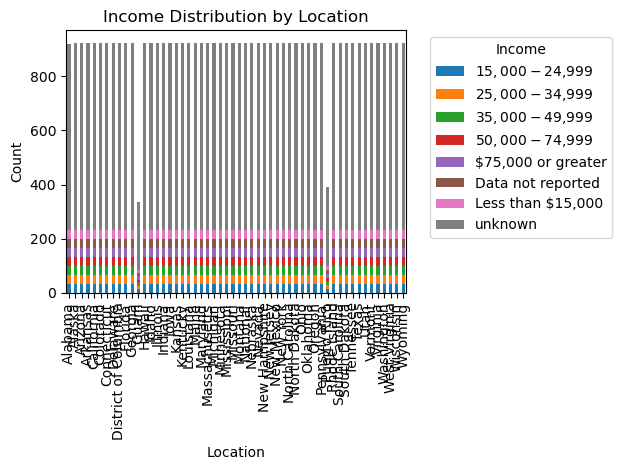

In [32]:
#Bar plots for categorical comparisons

# Education vs LocationDesc
new_df.groupby('LocationDesc')['Education'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Education Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gender vs LocationDesc
new_df.groupby('LocationDesc')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Income vs LocationDesc
new_df.groupby('LocationDesc')['Income'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Income Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


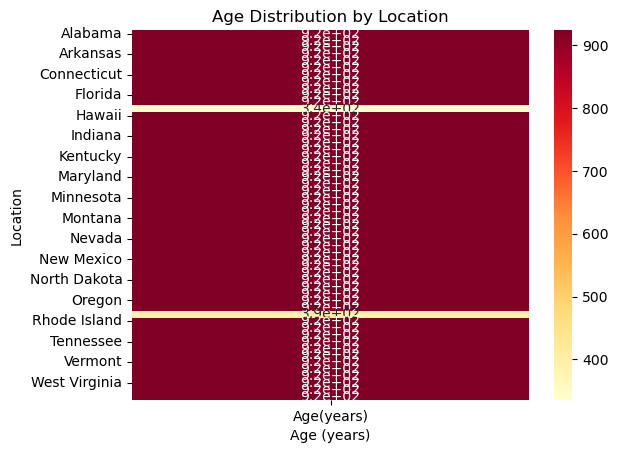

In [33]:
# Heatmap for Age(years) vs LocationDesc

pivot_table = pd.pivot_table(new_df, values='Age(years)', index='LocationDesc', aggfunc='count')
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True)
plt.title('Age Distribution by Location')
plt.ylabel('Location')
plt.xlabel('Age (years)')
plt.show()


In [34]:
new_df.head(20)

,LocationDesc,Education,Gender,Income,Age(years)
0,Alabama,unknown,unknown,unknown,unknown
1,Alabama,unknown,Male,unknown,unknown
2,Alabama,unknown,Female,unknown,unknown
3,Alabama,Less than high school,unknown,unknown,unknown
4,Alabama,High school graduate,unknown,unknown,unknown
5,Alabama,Some college or technical school,unknown,unknown,unknown
6,Alabama,College graduate,unknown,unknown,unknown
7,Alabama,unknown,unknown,unknown,18 - 24
8,Alabama,unknown,unknown,unknown,25 - 34
9,Alabama,unknown,unknown,unknown,35 - 44


In [35]:
new_df['Gender'].value_counts()

Gender
unknown    45288
Male        1742
Female      1742
Name: count, dtype: int64

In [36]:
new_df['Education'].value_counts()

Education
unknown                             41804
Less than high school                1742
High school graduate                 1742
Some college or technical school     1742
College graduate                     1742
Name: count, dtype: int64

In [37]:
new_df['Age(years)'].value_counts()

Age(years)
unknown        38324
35 - 44         1742
45 - 54         1742
18 - 24         1741
25 - 34         1741
55 - 64         1741
65 or older     1741
Name: count, dtype: int64

In [38]:
new_df['Income'].value_counts()

Income
unknown               36578
Less than $15,000      1742
$15,000 - $24,999      1742
$25,000 - $34,999      1742
$35,000 - $49,999      1742
$50,000 - $74,999      1742
$75,000 or greater     1742
Data not reported      1742
Name: count, dtype: int64

### (Modeling) - Findings + Technical Report (K-means using weighted features)

In [40]:
# Create mapping dictionaries for each feature:


education_map = {
    'College graduate': 5,
    'Some college or technical school': 4,
    'High school graduate': 3,
    'Less than high school': 2,
    'unknown': 1
}

gender_map = {
    'Female': 3,
    'Male': 2,
    'unknown': 1
}

age_map = {
    '25 - 34': 7,
    '35 - 44': 6,
    '18 - 24': 5,
    '45 - 54': 4,
    '55 - 64': 3,
    '65 or older': 2,
    'unknown': 1
}

income_map = {
    '$75,000 or greater': 8,
    '$50,000 - $74,999': 7,
    '$35,000 - $49,999': 6,
    '$25,000 - $34,999': 5,
    '$15,000 - $24,999': 4,
    'Less than $15,000': 3,
    'Data not reported': 2,
    'unknown': 1
}


In [41]:
#Apply these mappings to create new scaled columns:

# Create copy of the dataframe
new_df = new_df.copy()

# Apply mappings to create new scaled columns
new_df['Education_scaled'] = new_df['Education'].map(education_map)
new_df['Gender_scaled'] = new_df['Gender'].map(gender_map)
new_df['Age_scaled'] = new_df['Age(years)'].map(age_map)
new_df['Income_scaled'] = new_df['Income'].map(income_map)


In [42]:
#Create a new dataframe with the scaled features:
scaled_df = new_df[['LocationDesc', 'Education_scaled', 'Gender_scaled', 'Age_scaled', 'Income_scaled']]


In [43]:
scaled_df.shape

(48772, 5)

In [44]:
scaled_df.head()

,LocationDesc,Education_scaled,Gender_scaled,Age_scaled,Income_scaled
0,Alabama,1,1,1,1
1,Alabama,1,2,1,1
2,Alabama,1,3,1,1
3,Alabama,2,1,1,1
4,Alabama,3,1,1,1


In [45]:
#Normalize the scaled features to ensure they're on the same scale:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scaled_df[['Education_scaled', 'Gender_scaled', 'Age_scaled', 'Income_scaled']])

scaled_df[['Education_scaled', 'Gender_scaled', 'Age_scaled', 'Income_scaled']] = scaled_features


/var/folders/xt/hdlbn4j903v98px3bq4pf0jc0000gn/T/ipykernel_44770/2054429731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[['Education_scaled', 'Gender_scaled', 'Age_scaled', 'Income_scaled']] = scaled_features


In [46]:
### Add back in the Geolocation field, convert to new fields for Longitude and Latitude




In [47]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X = scaled_df[['Education_scaled', 'Gender_scaled', 'Age_scaled', 'Income_scaled']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataframe
scaled_df['Cluster'] = kmeans.labels_


/var/folders/xt/hdlbn4j903v98px3bq4pf0jc0000gn/T/ipykernel_44770/4124225901.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df['Cluster'] = kmeans.labels_


In [48]:
scaled_df.shape

(48772, 6)

In [49]:
scaled_df.head()

,LocationDesc,Education_scaled,Gender_scaled,Age_scaled,Income_scaled,Cluster
0,Alabama,0.00,0.0,0.0,0.0,0
1,Alabama,0.00,0.5,0.0,0.0,2
2,Alabama,0.00,1.0,0.0,0.0,2
3,Alabama,0.25,0.0,0.0,0.0,0
4,Alabama,0.50,0.0,0.0,0.0,4


In [50]:
#

In [51]:
# Group the data by cluster and LocationDesc
cluster_locations = new_df.groupby(['Cluster', 'LocationDesc']).size().reset_index(name='Count')

# Sort the grouped data by cluster and count in descending order
cluster_locations_sorted = cluster_locations.sort_values(['Cluster', 'Count'], ascending=[True, False])

# Get the top locations for each cluster
top_locations = cluster_locations_sorted.groupby('Cluster').head(5)

# Display the results
for cluster in top_locations['Cluster'].unique():
    print(f"\nTop 5 locations in Cluster {cluster}:")
    print(top_locations[top_locations['Cluster'] == cluster][['LocationDesc', 'Count']])


KeyError: 'Cluster'